# Figure 2. scRiskCell performance and application.
*Xueqin Xie*  
*2025/05/25*

(A) Schematic of scRiskCell. DEGs: differentially expressed genes; GRNs: gene regulatory networks. (B) Bar graphs demonstrating the percentage of beta risk and non-risk cells in each donor. ND n = 49; preT2D n = 23; T2D n = 34. Two-sided Wilcoxon rank-sum test. P-values were adjusted for multiple comparisons using the Benjamini-Hochberg (BH) method. Significance levels: * p.adj < 0.05, ** p.adj < 0.01, *** p.adj < 0.001. (C) ROC curve of support vector machine (SVM)-based model for disease states prediction (ND, preT2D, and T2D) using beta risk cell proportions. Shaded areas represent 95% confidence intervals estimated from 2,000 bootstrap replicates. (D–E) Pearson correlation between beta risk cell ratio and HbA1c (D, n = 105), and C-peptide (E, n = 31). Pearson correlation was assessed using a two-sided t-test for the correlation coefficient. The bands around the linear regression line represent the range of 95% confidence interval of the risk cell ratio. (F) Differentially expressed genes (DEGs) at the pseudobulk level between risk and non-risk of beta cells. Genes with an adjusted p-value < 0.05 were considered statistically differentially expressed. Adjusted p-values were derived from pseudobulk differential expression analysis using DESeq2 with BH correction. (Bottom) Violin plots highlight examples of DEGs with different dysregulation directions between risk and non-risk beta cells. (G) Venn diagrams of unique/shared genes targeted by NEUROD1, ATF4, ATF6, and XBP1 in risk and non-risk beta cells. Example of genes in each category is listed at the bottom of each graph.

***

##### **Figure 2(A) and 2(G)** was created using Adobe Illustrator (AI) to visually present the conceptual design.
##### **Figures 2(B) and 2(C)** were generated using the Python environment.
##### **Figures 2(D-F)** were generated using the R environment.

---

### Figure 2(D)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


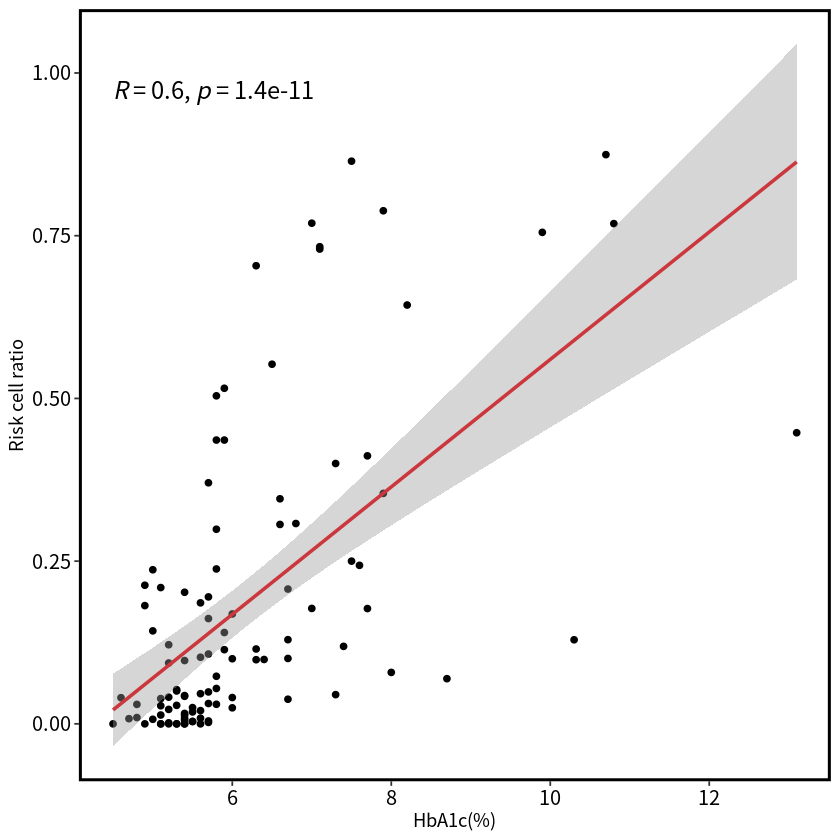

In [4]:
library(dplyr)
library(ggplot2)
library(ggpubr)


donor_ratio = read.csv("./donor_ratio_infor.csv",head = T)

correlation = cor.test(donor_ratio$HbA1c, donor_ratio$Beta_risk_ratios, method = "pearson")
ggplot(donor_ratio, aes(x = HbA1c, y = Beta_risk_ratios)) +
  geom_point() +  
  geom_smooth(method = "lm", se = TRUE, color = "#cb373c") + 
  stat_cor(method = "pearson", size = 5,fontface = "bold",label.y = 0.97) +  
  labs(x = "HbA1c(%)", y = "Risk cell ratio")+
  theme_bw()+
  theme( 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    legend.position = "none",
    panel.border = element_rect(color = "black", size = 1.7),
    axis.text.x = element_text(color = "black", size = 12),
    axis.text.y = element_text(color = "black", size = 12)
  )


### Figure 2(E)

`geom_smooth()` using formula = 'y ~ x'


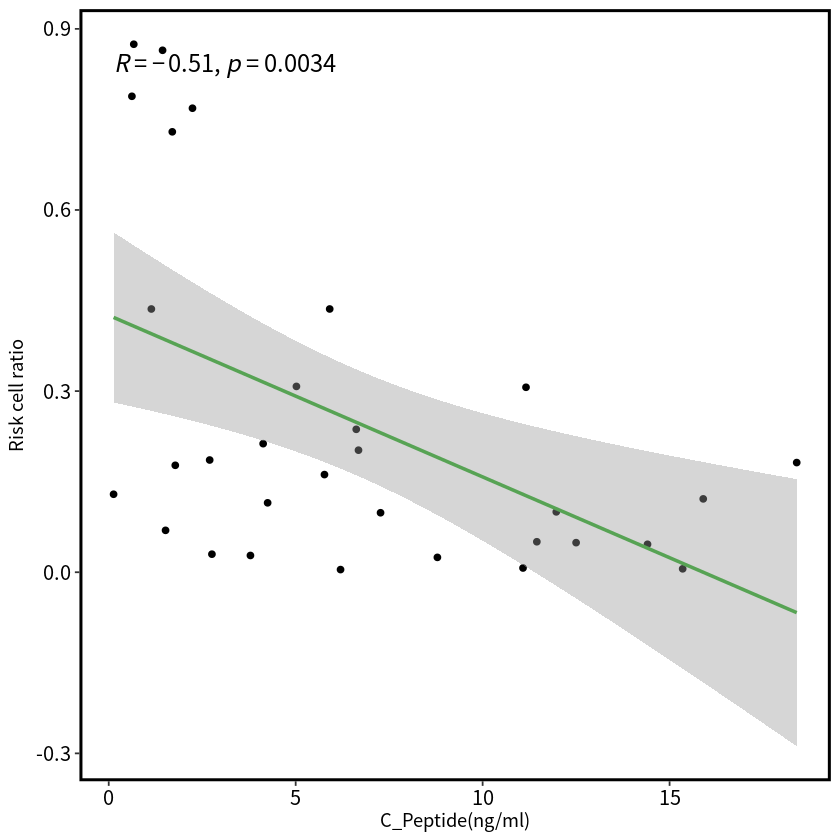

In [5]:
# Correlation between c-peptide and risk cell ratios
donor_ratio_sub = donor_ratio[!is.na(donor_ratio$C_Peptide), ]

correlation = cor.test(donor_ratio_sub$C_Peptide, donor_ratio_sub$Beta_risk_ratios, method = "pearson")

ggplot(donor_ratio_sub, aes(x = C_Peptide, y = Beta_risk_ratios)) +
  geom_point() +  
  geom_smooth(method = "lm", se = TRUE, color = "#57a354") + 
  stat_cor(method = "pearson", size = 5,fontface = "bold") +  
  labs(x = "C_Peptide(ng/ml)", y = "Risk cell ratio")+
  theme_bw()+
  theme( 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    legend.position = "none",
    panel.border = element_rect(color = "black", size = 1.7),
    axis.text.x = element_text(color = "black", size = 12),
    axis.text.y = element_text(color = "black", size = 12)
  )


### Figure 2(F)

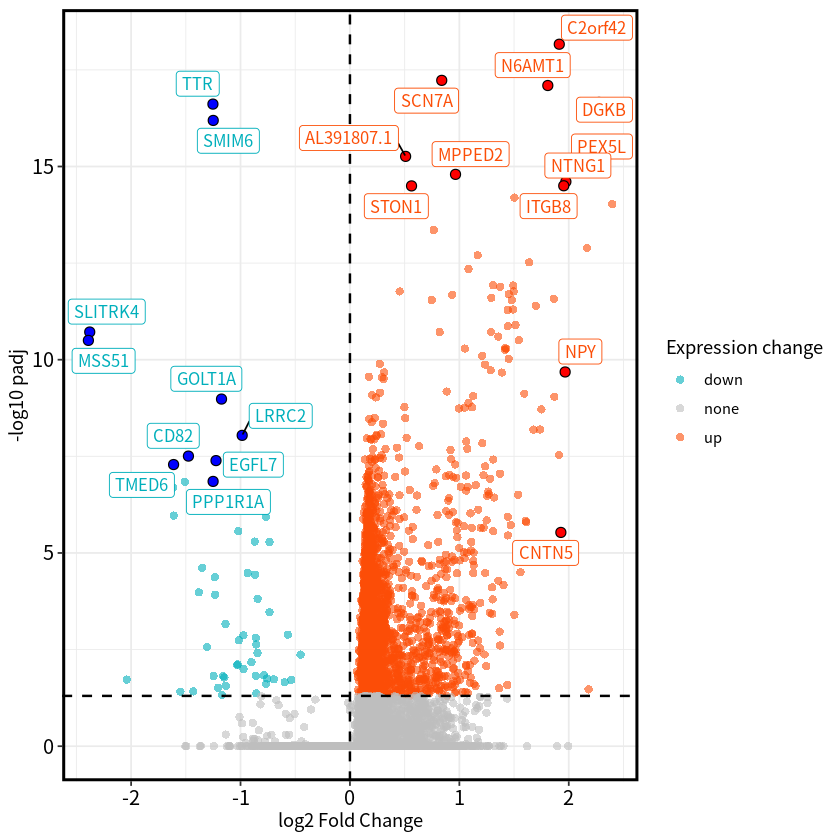

In [20]:
library(ggrepel)

degs = readRDS("./beta_risk_allDEG.rds")
sig_degs = read.csv('./beta_risk_sigDEGs.csv',header = T, row.names = 1)

top_SigGenes = sig_degs %>%
  mutate(sig = case_when(
    avg_log2FC > 0 ~ "up",
    avg_log2FC < 0 ~ "down"
  )) %>%
  group_by(sig) %>%
  arrange(p_val_adj) %>%
  slice(1:10)
top_SigGenes = rbind(top_SigGenes,sig_degs[c('NPY','CNTN5'),])

ggplot(data = degs, aes(x = avg_log2FC, y = -log10(p_val_adj), color = sig)) +
  geom_point(aes(color = sig), alpha = 0.6, shape = 16,size=2) +  
  geom_point(data = top_SigGenes[which(top_SigGenes$sig=='up'),], shape = 21, size = 2.5, fill = "red", colour = "black") +
  geom_point(data = top_SigGenes[which(top_SigGenes$sig=='down'),], shape = 21, size = 2.5, fill = "blue", colour = "black") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed",size=0.7) +
  geom_vline(xintercept = 0, linetype = "dashed",size=0.7) +
  scale_color_manual(values=c("#00afbb", "grey","#fc4e07"),limits = c('down', 'none', 'up')) +
  labs(x = 'log2 Fold Change', y = '-log10 padj', colour = "Expression change") +  
  geom_label_repel (data = top_SigGenes, aes(label = gene), size = 3.5,
                   segment.color = "black", show.legend = FALSE) +
  theme_bw() +
  theme(
    panel.border = element_rect(color = "black", size = 1.7),
    axis.text.x = element_text(color = "black", size = 12),
    axis.text.y = element_text(color = "black", size = 12)
  )

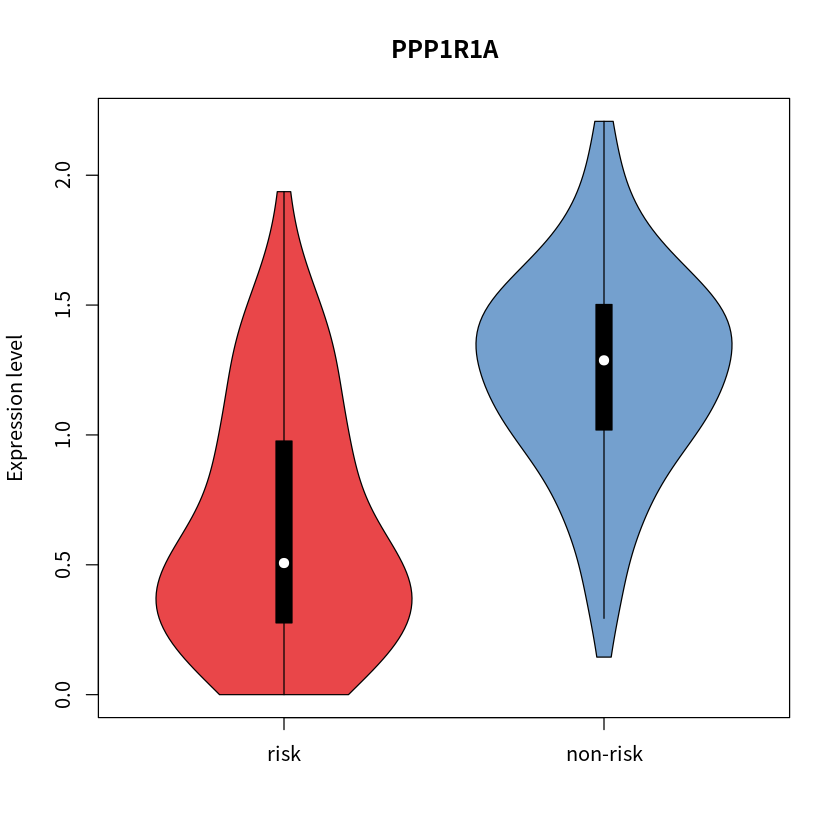

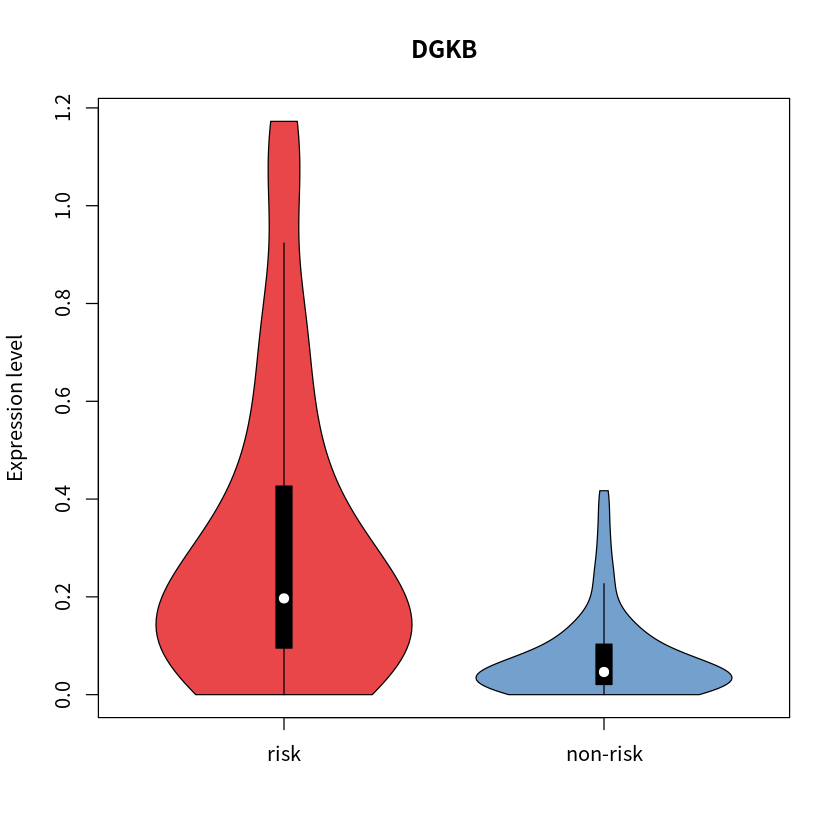

In [24]:
library(vioplot)

beta_bulk = readRDS("./beta_risk_peaudoBulk.rds")
data = FetchData(beta_bulk, vars = c("PPP1R1A","DGKB","risk"))

disease = c("risk","non-risk")
genes = c("PPP1R1A","DGKB")
cols = c('#e94649','#74a0ce')
for (gene in genes) {
  split_data = split(data, list(data$risk))
  violin_data = list()
  for (name in names(split_data)) {
    violin_data[[name]] = split_data[[name]][,gene]
  }
  
  violin_data = violin_data[disease]
  vioplot(violin_data, names = names(violin_data),col = cols)
  title(main = gene, ylab = "Expression level", xlab = "")
  
}